## Bengaluru House Price Prediction

In [142]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [143]:
trainds = pd.read_csv(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Data\Data\Train.csv')

In [144]:
testds = pd.read_csv(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Data\Data\Test.csv')

In [145]:
new_testds = pd.read_csv(r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Data\Data\New_Test.csv')

In [146]:
trainds.shape

(13320, 9)

In [147]:
testds.shape

(1480, 9)

In [148]:
trainds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [149]:
testds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [150]:
trainds.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [151]:
testds.isna().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [152]:
trainds['dtype'] = 'train'

In [153]:
testds['dtype'] = 'test'

In [154]:
trainds

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,train
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,train
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,train
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,train


In [155]:
trainds[trainds.duplicated()].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.00,train
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.00,train
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.50,train
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.00,train
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.00,train
1449,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1693,3.0,3.0,57.39,train
1477,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1330,2.0,1.0,56.00,train
1668,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,Prityel,1075,2.0,1.0,45.00,train
1763,Super built-up Area,Ready To Move,KUDLU MAIN ROAD,3 BHK,NaN,1464,3.0,2.0,56.00,train
2050,Super built-up Area,Ready To Move,Haralur Road,2 BHK,RInceeg,1140,2.0,2.0,43.00,train


In [156]:
trainds.drop_duplicates(inplace=True)

In [157]:
testds.duplicated().sum()

33

In [158]:
data = pd.concat([trainds, testds])

In [159]:
data = data.reset_index().drop(columns="index")

In [160]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
14266,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
14267,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN,test
14268,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
14269,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


In [161]:
data['area_type'].value_counts()

Super built-up  Area    9263
Built-up  Area          2668
Plot  Area              2243
Carpet  Area              97
Name: area_type, dtype: int64

In [162]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom', '16 Bedroom'], dtype=object)

In [163]:
data['size'] = data['size'].str.replace('Bedroom', 'BHK')

In [164]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train


In [165]:
data['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '1 RK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', nan, '27 BHK', '10 BHK',
       '19 BHK', '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK',
       '18 BHK'], dtype=object)

In [166]:
data['availability'].value_counts()

Ready To Move    11334
18-Dec             328
18-May             321
18-Apr             294
18-Aug             212
                 ...  
16-Nov               1
15-Jun               1
14-Nov               1
16-Apr               1
16-Jan               1
Name: availability, Length: 82, dtype: int64

In [167]:
data['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul', '16-Apr'], dtype=object)

<AxesSubplot:>

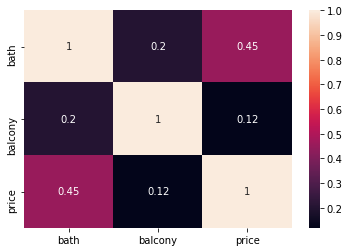

In [168]:
sns.heatmap(data.corr(),annot=True)

In [169]:
data.isna().sum()

area_type          0
availability       0
location           1
size              18
society         5954
total_sqft         0
bath              80
balcony          674
price           1480
dtype              0
dtype: int64

In [170]:
trainds.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype              0
dtype: int64

In [176]:
data[data['location'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0,train


In [172]:
data.shape

(14271, 10)

In [181]:
data.dropna(subset=['location'], axis=0, inplace=True)

In [183]:
data.shape

(14270, 10)

In [25]:
trainds[trainds['total_sqft'] == '1200']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.0,train
55,Super built-up Area,Ready To Move,Begur Road,2 BHK,Dhalsh,1200,2.0,2.0,44.0,train
93,Plot Area,Ready To Move,ISRO Layout,4 Bedroom,NaN,1200,4.0,2.0,155.0,train
98,Built-up Area,Ready To Move,Devasthanagalu,2 BHK,NaN,1200,2.0,1.0,65.0,train
99,Built-up Area,Ready To Move,T Dasarahalli,3 Bedroom,NaN,1200,3.0,1.0,90.0,train
...,...,...,...,...,...,...,...,...,...,...
13247,Plot Area,Ready To Move,5th Stage BEML Layout,4 Bedroom,NaN,1200,5.0,NaN,325.0,train
13249,Plot Area,Ready To Move,KR Puram,2 Bedroom,Anncyar,1200,2.0,0.0,75.0,train
13279,Plot Area,Ready To Move,Vishwanatha Nagenahalli,6 Bedroom,NaN,1200,5.0,NaN,130.0,train
13296,Super built-up Area,Ready To Move,Cox Town,2 BHK,NaN,1200,2.0,2.0,140.0,train


In [198]:
trainds['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [219]:
###trainds['total_sqft'][trainds['area_type'] == 'Plot  Area'].str.find('-')

In [200]:
data.isna().sum()

area_type          0
availability       0
location           0
size              18
society         5954
total_sqft         0
bath              80
balcony          674
price           1480
dtype              0
dtype: int64

In [215]:
data['society'].fillna('Unknown', inplace=True)

In [216]:
data.isna().sum()

area_type          0
availability       0
location           0
size              18
society            0
total_sqft         0
bath              80
balcony          674
price           1480
dtype              0
dtype: int64

In [201]:
data[data['size'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185,train
1766,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000,train
2251,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000,train
2783,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785,train
2835,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800,train
5245,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115,train
6287,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730,train
6492,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490,train
6573,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545,train
7499,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000,train


In [217]:
data[data['area_type'] =='Plot  Area'].sort_values(by='location')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
14019,Plot Area,Ready To Move,Devarachikkanahalli,6 BHK,Unknown,1500,5.0,1.0,NaN,test
13219,Plot Area,Ready To Move,Devarachikkanahalli,5 BHK,Unknown,1960,6.0,NaN,NaN,test
2457,Plot Area,Ready To Move,Devarachikkanahalli,2 BHK,Unknown,1200,2.0,2.0,83.0,train
5440,Plot Area,Ready To Move,Devarachikkanahalli,3 BHK,Unknown,1200,3.0,1.0,160.0,train
2432,Plot Area,18-Feb,ittamadu,3 BHK,Unknown,600,2.0,1.0,110.0,train
...,...,...,...,...,...,...,...,...,...,...
8578,Plot Area,18-Apr,tc.palya,2 BHK,Unknown,1000,2.0,1.0,55.0,train
9390,Plot Area,18-Apr,tc.palya,3 BHK,Unknown,1400,2.0,1.0,78.0,train
6730,Plot Area,Ready To Move,tc.palya,2 BHK,Unknown,880,2.0,1.0,48.0,train
3444,Plot Area,Ready To Move,"white field,kadugodi",6 BHK,Unknown,2100,6.0,NaN,275.0,train


In [213]:
from scipy.stats import mode

In [222]:
data[data['area_type'] =='Plot  Area'].pivot_table(values="size", index = "location", aggfunc=(lambda x: mode(x).mode[0]))

,size
location,
Devarachikkanahalli,2 BHK
ittamadu,3 BHK
south,3 BHK
1 Annasandrapalya,11 BHK
1 Ramamurthy Nagar,11 BHK
...,...
soukya road,3 BHK
t.c palya,6 BHK
tc.palya,2 BHK


In [270]:
plot_table = data[data['area_type'] =='Plot  Area'].pivot_table(values="size", index = "location", aggfunc=(lambda x: mode(x).mode[0]))

In [307]:
plot_table.loc['Devarachikkanahalli']                ## == 'Gottigere'

size    8 BHK
Name: Devarachikkanahalli, dtype: object

In [292]:
def plot_na(x):
    return plot_table['size'].loc[x["location"]]

In [283]:
data[data["size"].isna()].head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185,train


In [284]:
data[data['area_type'] =='Plot  Area'].head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.0,train


In [285]:
 test = data[data["size"].isna()].head(1)

In [280]:
test = data[data['area_type'] =='Plot  Area'].head(1)

In [286]:
plot_na(test)

location
Sarjapur  Road    4 BHK
Name: size, dtype: object

In [287]:
data[data["size"].isnull()].apply(plot_na, axis= 1)

579      4 BHK
1766         0
2251     4 BHK
2783     4 BHK
2835     4 BHK
5245     4 BHK
6287     4 BHK
6492     4 BHK
6573     4 BHK
7499     4 BHK
8099     2 BHK
8343         0
8468     2 BHK
10291    3 BHK
10649    4 BHK
11164    4 BHK
12942    3 BHK
13951    3 BHK
dtype: object

In [288]:
data['size'].fillna(data[data['size'].isnull()].apply(plot_na, axis= 1), inplace = True)

In [290]:
data['size'].isna().sum()

0

In [291]:
data[data['area_type'] =='Plot  Area']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.0,train
9,Plot Area,Ready To Move,Gandhi Bazar,6 BHK,Unknown,1020,6.0,NaN,370.0,train
11,Plot Area,Ready To Move,Whitefield,4 BHK,Prrry M,2785,5.0,3.0,295.0,train
14,Plot Area,Ready To Move,Sarjapur,3 BHK,Skityer,2250,3.0,2.0,148.0,train
22,Plot Area,Ready To Move,Thanisandra,4 BHK,Soitya,2800,5.0,2.0,380.0,train
...,...,...,...,...,...,...,...,...,...,...
14242,Plot Area,Ready To Move,Hebbal,2 BHK,Unknown,5149,2.0,0.0,NaN,test
14257,Plot Area,Ready To Move,Basaveshwara Nagar,4 BHK,Unknown,600,4.0,1.0,NaN,test
14260,Plot Area,Ready To Move,Akshayanagara West,8 BHK,Unknown,1200,5.0,2.0,NaN,test
14263,Plot Area,18-Aug,Vishweswaraiah Layout 4th Block,1 BHK,Unknown,1200,1.0,1.0,NaN,test


In [308]:
data.isna().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath              80
balcony          674
price           1480
dtype              0
dtype: int64

In [311]:
data.groupby(['size']).bath.median()

size
0          NaN
1 BHK      1.0
1 RK       1.0
10 BHK    10.0
11 BHK    10.0
12 BHK     6.0
13 BHK    13.0
14 BHK    15.0
16 BHK    16.0
18 BHK    18.0
19 BHK    16.0
2 BHK      2.0
27 BHK    27.0
3 BHK      3.0
4 BHK      4.0
43 BHK    40.0
5 BHK      5.0
6 BHK      6.0
7 BHK      7.0
8 BHK      8.0
9 BHK      9.0
Name: bath, dtype: float64

In [345]:
data['bath'] = data.groupby(data['size'])['bath'].transform(lambda x: x.fillna(x.median()))

In [346]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
14266,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
14267,Super built-up Area,Ready To Move,Gottigere,3 BHK,Unknown,1660,3.0,2.0,NaN,test
14268,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
14269,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


In [347]:
data[data['bath'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype


In [348]:
data.isna().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony          674
price           1480
dtype              0
dtype: int64

In [349]:
data[data['balcony'] == 0]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype
24,Super built-up Area,18-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,0.0,25.25,train
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.00,train
42,Super built-up Area,Ready To Move,Ganga Nagar,1 BHK,Ceove G,600,1.0,0.0,38.00,train
43,Plot Area,Ready To Move,Yelahanka,1 BHK,Unknown,660,1.0,0.0,48.00,train
46,Super built-up Area,Ready To Move,Doddathoguru,2 BHK,LancyRe,970,2.0,0.0,33.00,train
...,...,...,...,...,...,...,...,...,...,...
14168,Built-up Area,Ready To Move,nagendra block,9 BHK,Unknown,950,9.0,0.0,NaN,test
14170,Plot Area,Ready To Move,6th Phase JP Nagar,5 BHK,Unknown,1440,4.0,0.0,NaN,test
14187,Plot Area,Ready To Move,Sarakki Nagar,1 BHK,Unknown,600,1.0,0.0,NaN,test
14224,Super built-up Area,Ready To Move,Uttarahalli,2 BHK,Niiewem,1150,2.0,0.0,NaN,test


In [350]:
data.groupby(['total_sqft'])['balcony'].median()

total_sqft
1              NaN
1.25Acres      2.0
1.26Acres      0.0
1000           1.0
1000 - 1285    0.0
              ... 
995            1.0
996            1.0
997            2.5
998            2.0
999            2.0
Name: balcony, Length: 2221, dtype: float64

In [351]:
data.groupby(['size'])['balcony'].median()

size
1 BHK     1.0
1 RK      0.0
10 BHK    3.0
11 BHK    3.0
12 BHK    2.0
13 BHK    0.0
14 BHK    0.0
16 BHK    NaN
18 BHK    NaN
19 BHK    NaN
2 BHK     1.0
27 BHK    0.0
3 BHK     2.0
4 BHK     2.0
43 BHK    0.0
5 BHK     2.0
6 BHK     2.0
7 BHK     2.0
8 BHK     2.0
9 BHK     2.0
Name: balcony, dtype: float64

In [352]:
data['balcony'] = data.groupby(data['size'])['balcony'].transform(lambda x: x.fillna(x.median()))

In [359]:
data['balcony'].fillna(2, inplace=True)

In [360]:
data[data['balcony'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype


In [53]:
data.dtypes

area_type      object
location       object
size            int64
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype          object
dtype: object

In [361]:
data['total_sqft'].nunique()

2221

In [365]:
a = '500.50.sq'

In [366]:
print(a.split('.')[0])

500


In [367]:
data['tsft1'] = 0
data['tsft2'] = 0

In [368]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype,tsft1,tsft2
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train,0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00,train,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.00,train,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train,0,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200,2.0,1.0,51.00,train,0,0


In [59]:
##data['sizebhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [60]:
for i in data['total_sqft'].index:
    if data['total_sqft'].iloc[i].__contains__('-'):
        a,b = data['total_sqft'].iloc[i].split('-')
        a = re.sub("[a-zA-Z]","",a)
        b = re.sub("[a-zA-Z]","",b)
        print(a)
        print(b)
    else:
        print(re.sub("[a-zA-Z]","",data['total_sqft'].iloc[i]))

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
1100
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 
 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
600
660
1330.74
600
970
1459
800
869
1270
1670
2010
1185
1600
1200
3010 
 3410
1500
1407
840
4395
845
5700
1160
3000
1100
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 
 3450
1326
1325
1499
3000
1665
708
1060
710
1000
1000
1450
1200
1296
1540
2894
1330
1200
1200
2502
650
2400
1007
1200
966
1630
1640
782
1260
1800
1413
1116
1530
3700
2497
1540
1436
1100
276
1427
2061
3067 
 8156
2650
1282
1050
1600
945
1500
950
1870
1600
880
1200
1535
950
1360
1042 
 1105
1280
1260
5000
3050
1563.05
1000
1167
4000
1828
890
1612
1034
1710
957
1250
2795
1125
1020
1200
1735
2050
3750
1350
1063
1904
4200
2000
1145 
 1340
1425
1500
1060
1470
1300
450
1152
1350
1550
1500
600
400
705
770
1242
1700
2144
1704
1070
1846
1340
1025
1015 
 1540
1200
2250
1550
1200
1800
1200
1

In [369]:
for i in data['total_sqft'].index:
    if data['total_sqft'].iloc[i].__contains__(' - '):
        a,b = data['total_sqft'].iloc[i].split(' - ')
        c = a.split(".")[0]
        d = b.split('.')[0]
        data['tsft1'].iloc[i] = float(c)
        data['tsft2'].iloc[i] = float(d)
        print(c)
        print(d)
    else:
        e = data['total_sqft'].iloc[i].split(".")[0]
        print("e", e)
        g=re.sub("\D","",e)
        print("g", g)
        data['tsft1'].iloc[i] = float(g)
        data['tsft2'].iloc[i] = float(g)
        #print(g)

e 1056
g 1056
e 2600
g 2600
e 1440
g 1440
e 1521
g 1521
e 1200
g 1200
e 1170
g 1170
e 2732
g 2732
e 3300
g 3300
e 1310
g 1310
e 1020
g 1020
e 1800
g 1800
e 2785
g 2785
e 1000
g 1000
e 1100
g 1100
e 2250
g 2250
e 1175
g 1175
e 1180
g 1180
e 1540
g 1540
e 2770
g 2770
e 1100
g 1100
e 600
g 600
e 1755
g 1755
e 2800
g 2800
e 1767
g 1767
e 510
g 510
e 1250
g 1250
e 660
g 660
e 1610
g 1610
e 1151
g 1151
e 1025
g 1025
2100
2850
e 1075
g 1075
e 1760
g 1760
e 1693
g 1693
e 1925
g 1925
e 700
g 700
e 1070
g 1070
e 1724
g 1724
e 1290
g 1290
e 1143
g 1143
e 1296
g 1296
e 1254
g 1254
e 600
g 600
e 660
g 660
e 1330
g 1330
e 600
g 600
e 970
g 970
e 1459
g 1459
e 800
g 800
e 869
g 869
e 1270
g 1270
e 1670
g 1670
e 2010
g 2010
e 1185
g 1185
e 1600
g 1600
e 1200
g 1200
3010
3410
e 1500
g 1500
e 1407
g 1407
e 840
g 840
e 4395
g 4395
e 845
g 845
e 5700
g 5700
e 1160
g 1160
e 3000
g 3000
e 1100
g 1100
e 1140
g 1140
e 1220
g 1220
e 1350
g 1350
e 1005
g 1005
e 500
g 500
e 1358
g 1358
e 1569
g 1569
e 1240
g 124

C:\Work\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


g 2061
3067
8156
e 2650
g 2650
e 1282
g 1282
e 1050
g 1050
e 1600
g 1600
e 945
g 945
e 1500
g 1500
e 950
g 950
e 1870
g 1870
e 1600
g 1600
e 880
g 880
e 1200
g 1200
e 1535
g 1535
e 950
g 950
e 1360
g 1360
1042
1105
e 1280
g 1280
e 1260
g 1260
e 5000
g 5000
e 3050
g 3050
e 1563
g 1563
e 1000
g 1000
e 1167
g 1167
e 4000
g 4000
e 1828
g 1828
e 890
g 890
e 1612
g 1612
e 1034
g 1034
e 1710
g 1710
e 957
g 957
e 1250
g 1250
e 2795
g 2795
e 1125
g 1125
e 1020
g 1020
e 1200
g 1200
e 1735
g 1735
e 2050
g 2050
e 3750
g 3750
e 1350
g 1350
e 1063
g 1063
e 1904
g 1904
e 4200
g 4200
e 2000
g 2000
1145
1340
e 1425
g 1425
e 1500
g 1500
e 1060
g 1060
e 1470
g 1470
e 1300
g 1300
e 450
g 450
e 1152
g 1152
e 1350
g 1350
e 1550
g 1550
e 1500
g 1500
e 600
g 600
e 400
g 400
e 705
g 705
e 770
g 770
e 1242
g 1242
e 1700
g 1700
e 2144
g 2144
e 1704
g 1704
e 1070
g 1070
e 1846
g 1846
e 1340
g 1340
e 1025
g 1025
1015
1540
e 1200
g 1200
e 2250
g 2250
e 1550
g 1550
e 1200
g 1200
e 1800
g 1800
e 1200
g 1200
e 1327
g 

IndexError: single positional indexer is out-of-bounds

In [ ]:
k = '30.Acres'
print(re.sub("\D"," ",k))

In [370]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype            object
tsft1             int64
tsft2             int64
dtype: object

In [371]:
data['calc_total_sqft'] = ((data['tsft2']+data['tsft1'])/2)

In [372]:
data['total_sqft'] = data['calc_total_sqft']

In [373]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype,tsft1,tsft2,calc_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,train,1056,1056,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600.0,5.0,3.0,120.00,train,2600,2600,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440.0,2.0,3.0,62.00,train,1440,1440,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,train,1521,1521,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200.0,2.0,1.0,51.00,train,1200,1200,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246.0,2.0,1.0,NaN,test,1246,1246,1246.0
14267,Super built-up Area,Ready To Move,Gottigere,3 BHK,Unknown,1660.0,3.0,2.0,NaN,test,1660,1660,1660.0
14268,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216.0,2.0,2.0,NaN,test,1216,1216,1216.0
14269,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996.0,2.0,1.0,NaN,test,996,996,996.0


In [374]:
data.drop(columns={ 'tsft1', 'tsft2'},inplace=True)

In [375]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype,calc_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,train,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600.0,5.0,3.0,120.00,train,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440.0,2.0,3.0,62.00,train,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,train,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200.0,2.0,1.0,51.00,train,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
14266,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246.0,2.0,1.0,NaN,test,1246.0
14267,Super built-up Area,Ready To Move,Gottigere,3 BHK,Unknown,1660.0,3.0,2.0,NaN,test,1660.0
14268,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216.0,2.0,2.0,NaN,test,1216.0
14269,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996.0,2.0,1.0,NaN,test,996.0


In [376]:
data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype,calc_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,train,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600.0,5.0,3.0,120.00,train,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440.0,2.0,3.0,62.00,train,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,train,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200.0,2.0,1.0,51.00,train,1200.0


In [377]:
data.location.nunique()

1358

In [73]:
data.head(2)

,area_type,location,size,total_sqft,bath,balcony,price,dtype,calc_total_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,train,1056.0
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,train,2600.0


<AxesSubplot:>

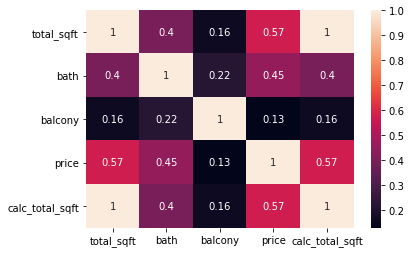

In [379]:
sns.heatmap(data.corr(), annot=True)

In [380]:
df = data.copy()

In [381]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,dtype,calc_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,train,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600.0,5.0,3.0,120.00,train,2600.0


In [382]:
df.reset_index(drop='index',inplace=True)

In [383]:
num_cols = df.select_dtypes(include=np.number).drop(columns='price').columns

In [384]:
cat_cols = df.select_dtypes(exclude=np.number).drop(columns={'dtype'}).columns

In [385]:
 cat_cols

Index(['area_type', 'availability', 'location', 'size', 'society'], dtype='object')

In [386]:
pp_cat_cols = pd.get_dummies(df[cat_cols])

In [387]:
pp_cat_cols.reset_index(drop='index', inplace=True)

In [388]:
scaler = StandardScaler()

In [389]:
pp_num_cols = pd.DataFrame(scaler.fit_transform(df[num_cols]),columns=num_cols)

In [390]:
pp_num_cols.tail(5)

,total_sqft,bath,balcony,calc_total_sqft
14265,-0.260127,-0.528029,-0.735595,-0.260127
14266,0.078861,0.208672,0.497888,0.078861
14267,-0.284691,-0.528029,0.497888,-0.284691
14268,-0.464829,-0.528029,-0.735595,-0.464829
14269,-0.338732,-0.528029,0.497888,-0.338732


In [391]:
combineds = pd.concat([pp_num_cols, pp_cat_cols, df[['dtype','price']]], axis='columns')

In [392]:
combineds

,total_sqft,bath,balcony,calc_total_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,...,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo,dtype,price
0,-0.415701,-0.528029,-0.735595,-0.415701,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,train,39.07
1,0.848544,1.682073,1.731372,0.848544,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,train,120.00
2,-0.101277,-0.528029,1.731372,-0.101277,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,train,62.00
3,-0.034953,0.208672,-0.735595,-0.034953,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,train,95.00
4,-0.297792,-0.528029,-0.735595,-0.297792,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,train,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14265,-0.260127,-0.528029,-0.735595,-0.260127,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,test,NaN
14266,0.078861,0.208672,0.497888,0.078861,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,test,NaN
14267,-0.284691,-0.528029,0.497888,-0.284691,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,test,NaN
14268,-0.464829,-0.528029,-0.735595,-0.464829,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test,NaN


In [393]:
pp_trainds = combineds[combineds['dtype'] == 'train'].drop(columns=['dtype'])

In [394]:
pp_testds = combineds[combineds['dtype'] == 'test'].drop(columns=['dtype','price'])

In [395]:
pp_trainds.head(5)

,total_sqft,bath,balcony,calc_total_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,...,society_YMarlti,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo,price
0,-0.415701,-0.528029,-0.735595,-0.415701,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,39.07
1,0.848544,1.682073,1.731372,0.848544,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,120.00
2,-0.101277,-0.528029,1.731372,-0.101277,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,62.00
3,-0.034953,0.208672,-0.735595,-0.034953,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,95.00
4,-0.297792,-0.528029,-0.735595,-0.297792,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,51.00


In [396]:
pp_testds.head(5)

,total_sqft,bath,balcony,calc_total_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,...,society_YCnce R,society_YMarlti,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
12790,-0.277322,-0.528029,0.497888,-0.277322,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12791,0.684782,4.628876,0.497888,0.684782,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12792,0.070673,1.682073,0.497888,0.070673,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12793,-0.197897,0.208672,-0.735595,-0.197897,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,-0.329725,-0.528029,-0.735595,-0.329725,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
pp_trainds.to_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Data\Data\PP_Train.csv")

In [398]:
pp_testds.to_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Data\Data\PP_Test.csv")

In [399]:
## Building a Model

In [400]:
model = LinearRegression()

In [401]:
X = pp_trainds.drop(columns='price')

In [402]:
y = pp_trainds['price']

In [403]:
model.fit(X,y)

LinearRegression()

In [404]:
model.coef_

array([8.01772867e+13, 2.64375000e+01, 8.90625000e-01, ...,
       1.03743335e+11, 1.03743335e+11, 1.03743335e+11])

In [104]:
model.intercept_

111.73361290542925

In [405]:
y_pred = model.predict(X)

In [406]:
y_pred

array([ 46.91796875, 145.9921875 ,  60.47265625, ..., 387.86328125,
        52.51171875, 400.859375  ])

In [407]:
mean_squared_error(y, y_pred, squared=False)

74.79573185284556

In [408]:
r2_score(y, y_pred)

0.7561950910098858

## Ridge

In [433]:
rid1 = Ridge(alpha=2)

In [434]:
rid1.fit(X, y)

Ridge(alpha=2)

In [435]:
y_rid2_pred = rid1.predict(X)

In [436]:
r2_score(y, y_rid2_pred)

0.6944680155793947

In [437]:
cross_val_score(rid1, X, y, scoring='r2', cv=10)

array([0.57104191, 0.1487029 , 0.61649481, 0.71675826, 0.26519527,
       0.55405405, 0.64029677, 0.61612088, 0.52308632, 0.47923748])

## Lasso

In [446]:
las1 = Lasso(alpha=1)

In [447]:
las1.fit(X, y)

Lasso(alpha=1)

In [448]:
y_las2_pred = las1.predict(X)

In [449]:
r2_score(y, y_las2_pred)

0.4268654012760753

In [450]:
cross_val_score(las1, X, y, scoring='r2', cv=10)

array([ 0.43328988, -0.04810353,  0.54240293,  0.5570613 ,  0.01395581,
        0.4518463 ,  0.44517173,  0.49921251,  0.45999446,  0.39985167])

## ElasticNet

In [456]:
elas1 = ElasticNet(l1_ratio=.5, alpha=1)

In [457]:
elas1.fit(X, y)

ElasticNet(alpha=1)

In [458]:
y_elas1_pred = elas1.predict(X)

In [459]:
r2_score(y, y_elas1_pred)

0.395203110581239

In [460]:
cross_val_score(elas1, X, y, scoring='r2', cv=10)

array([0.42765329, 0.09039003, 0.50295935, 0.50537892, 0.09762447,
       0.41845221, 0.39741755, 0.44097239, 0.41847036, 0.35833198])

In [424]:
X.head(10)

,total_sqft,bath,balcony,calc_total_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,...,society_YCnce R,society_YMarlti,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
0,-0.415701,-0.528029,-0.735595,-0.415701,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.848544,1.682073,1.731372,0.848544,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.101277,-0.528029,1.731372,-0.101277,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.034953,0.208672,-0.735595,-0.034953,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.297792,-0.528029,-0.735595,-0.297792,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.322356,-0.528029,-0.735595,-0.322356,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.956627,0.945372,0.497888,0.956627,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.421712,0.945372,0.497888,1.421712,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.207723,0.208672,-0.735595,-0.207723,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-0.445178,2.418774,0.497888,-0.445178,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
## Test Predictions

In [461]:
X_test = pp_testds

In [462]:
X_test.head(5)

,total_sqft,bath,balcony,calc_total_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,...,society_YCnce R,society_YMarlti,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
12790,-0.277322,-0.528029,0.497888,-0.277322,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12791,0.684782,4.628876,0.497888,0.684782,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12792,0.070673,1.682073,0.497888,0.070673,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12793,-0.197897,0.208672,-0.735595,-0.197897,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,-0.329725,-0.528029,-0.735595,-0.329725,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [463]:
y_test_rid_pred = rid1.predict(X_test)

In [464]:
y_test_las_pred = las1.predict(X_test)

In [465]:
y_test_elas_pred = elas1.predict(X_test)

In [466]:
new_ritestds = new_testds.copy()

In [467]:
new_latestds = new_testds.copy()

In [468]:
new_eltestds = new_testds.copy()

In [469]:
new_ritestds["price"] = np.abs(y_test_rid_pred)

In [470]:
new_ritestds.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,73.807763
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,229.575241
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,274.608155
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,61.494864
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,64.708357


In [471]:
new_latestds["price"] = np.abs(y_test_las_pred)

In [472]:
new_eltestds["price"] = np.abs(y_test_elas_pred)

In [473]:
new_ritestds.to_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Data\Data\New_Test_ridge.csv",index=False)

In [474]:
new_latestds.to_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Data\Data\New_Test_lasso.csv",index=False)

In [475]:
new_eltestds.to_csv(r"C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Data\Data\New_Test_elasticnet.csv",index=False)

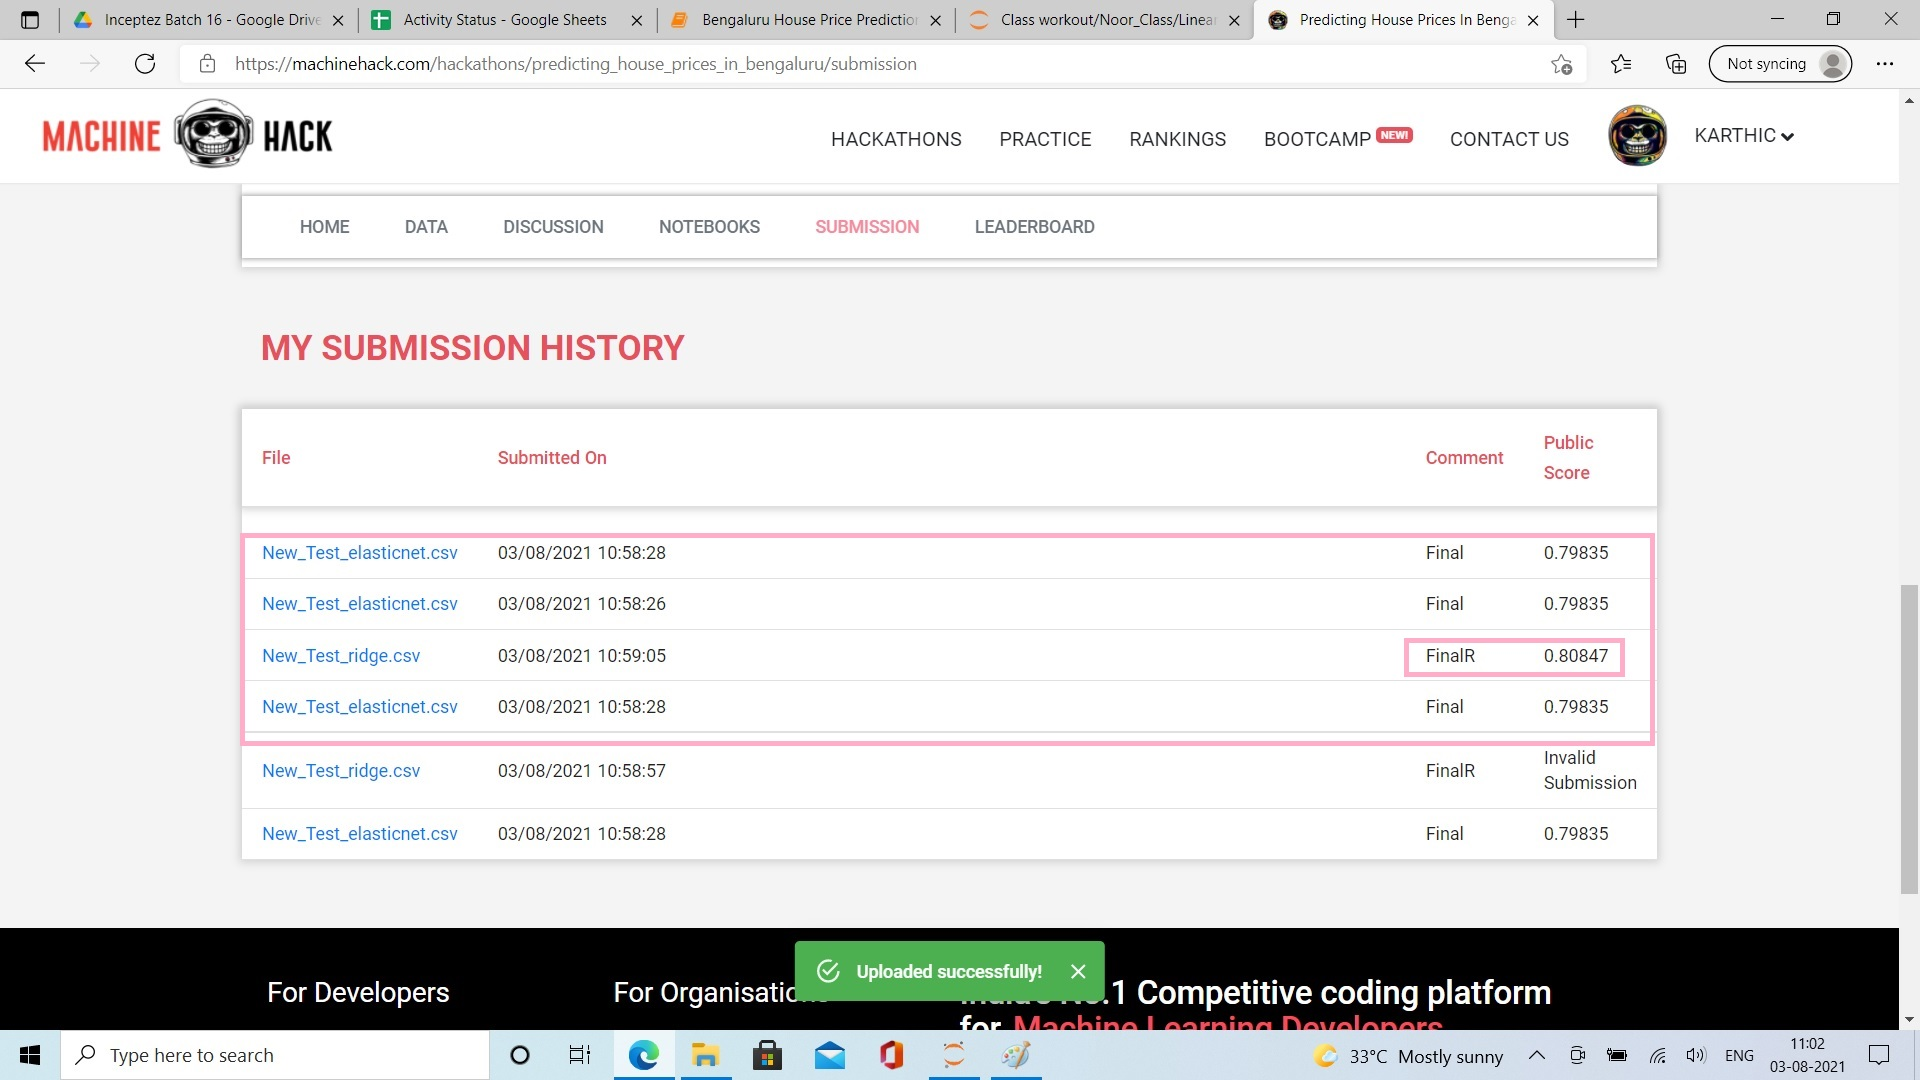

In [478]:
from IPython.display import Image
Image(filename=r'C:\Users\mailk\OneDrive\Desktop\AI and ML\Linear Regression\Bengaluru House Price Prediction\Bengaluru.jpg')